# Sizing Up a New Data Set

In [13]:
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
sys.stdout.write("Number of Rows of Data = " + str(len(xList)) + '\n')
sys.stdout.write("Number of Columns of Data = " + str(len(xList[1])))


Number of Rows of Data = 208
Number of Columns of Data = 61

# Determining the Nature of Attributes

In [74]:
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

for col in range(ncol):
    for row in xList:
        try:
            a = float(row[col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1

    colCounts.append(type)
    type = [0]*3

sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")
iCol = 0
#I deleted one /t to make it align.
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' +
                     str(types[1]) + '\t' + str(types[2]) + "\n")
    iCol += 1


Col#	Number	Strings	 Other
0	208	0	0
1	208	0	0
2	208	0	0
3	208	0	0
4	208	0	0
5	208	0	0
6	208	0	0
7	208	0	0
8	208	0	0
9	208	0	0
10	208	0	0
11	208	0	0
12	208	0	0
13	208	0	0
14	208	0	0
15	208	0	0
16	208	0	0
17	208	0	0
18	208	0	0
19	208	0	0
20	208	0	0
21	208	0	0
22	208	0	0
23	208	0	0
24	208	0	0
25	208	0	0
26	208	0	0
27	208	0	0
28	208	0	0
29	208	0	0
30	208	0	0
31	208	0	0
32	208	0	0
33	208	0	0
34	208	0	0
35	208	0	0
36	208	0	0
37	208	0	0
38	208	0	0
39	208	0	0
40	208	0	0
41	208	0	0
42	208	0	0
43	208	0	0
44	208	0	0
45	208	0	0
46	208	0	0
47	208	0	0
48	208	0	0
49	208	0	0
50	208	0	0
51	208	0	0
52	208	0	0
53	208	0	0
54	208	0	0
55	208	0	0
56	208	0	0
57	208	0	0
58	208	0	0
59	208	0	0
60	0	208	0


# Summary Statistics for Numeric and Categorical Attributes

In [75]:
from urllib.request import urlopen
import sys
import numpy as np
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])
type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))

colArray = np.array(colData)
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' +
            "Standard Deviation = " + '\t ' + str(colsd) + "\n")


#calculate quantile boundaries
ntiles = 4

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#run again with 10 equal intervals
ntiles = 10

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("Boundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#The last column contains categorical variables

col = 60
colData = []
for row in xList:
    colData.append(row[col])

unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)

#count up the number of elements having each value

catDict = dict(zip(list(unique),range(len(unique))))

catCount = [0]*2

for elt in colData:
    catCount[catDict[elt]] += 1

sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)


Mean = 	0.0538923076923		Standard Deviation = 	 0.0464159832226

Boundaries for 4 Equal Percentiles 
[0.0057999999999999996, 0.024375000000000001, 0.044049999999999999, 0.064500000000000002, 0.4264]
 
Boundaries for 10 Equal Percentiles 
[0.0057999999999999996, 0.0141, 0.022740000000000003, 0.027869999999999995, 0.036220000000000002, 0.044049999999999999, 0.050719999999999987, 0.059959999999999986, 0.077940000000000009, 0.10836, 0.4264]
 
Unique Label Values 
{'R', 'M'}

Counts for Each Value of Categorical Label 
['R', 'M']
[97, 111]


# Quantile‐Quantile Plot

In [83]:
import numpy as np
import pylab
import scipy.stats as stats
from urllib.request import urlopen
import sys
import numpy as np
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))


stats.probplot(colData, dist="norm", plot=pylab)
pylab.show()


# Using Python Pandas to Read and Summarize Data

In [80]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#print head and tail of data frame
print(rocksVMines.head())
print(rocksVMines.tail())



       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

In [81]:
#print summary of data frame
summary = rocksVMines.describe()
print(summary)

               V0          V1          V2          V3          V4          V5  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               V6          V7          V8          V9     ...             V50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.0851

# Parallel coordinates graph of rocks versus mines attributes

In [82]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

for i in range(208):
    #assign color based on color based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"

    #plot rows of data as if they were series data
    dataRow = rocksVMines.iloc[i,0:60]
    dataRow.plot(color=pcolor, alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()


# Cross Plotting Pairs of Attributes

In [84]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]

plot.scatter(dataRow2, dataRow3)


plot.xlabel("2nd Attribute")
plot.ylabel(("3rd Attribute"))
plot.show()

dataRow21 = rocksVMines.iloc[20,0:60]

plot.scatter(dataRow2, dataRow21)


plot.xlabel("2nd Attribute")
plot.ylabel(("21st Attribute"))
plot.show()

# Correlation between Classification Target and Real Attributes

In [85]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from random import uniform
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#change the targets to numeric values
target = []
for i in range(208):
    #assign 0 or 1 target value based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0)
    else:
        target.append(0.0)

    #plot rows of data as if they were series data
dataRow = rocksVMines.iloc[0:208,35]
plot.scatter(dataRow, target)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

#
#To improve the visualization, this version dithers the points a little
# and makes them somewhat transparent
target = []
for i in range(208):
    #assign 0 or 1 target value based on "M" or "R" labels
    # and add some dither
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))

    #plot rows of data as if they were series data
dataRow = rocksVMines.iloc[0:208,35]
plot.scatter(dataRow, target, alpha=0.5, s=120)

plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()


# Pearson’s Correlation Calculation for Attributes 2 versus 3 and 2 versus 21

In [86]:
import pandas as pd
from pandas import DataFrame
from math import sqrt
import sys
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]
dataRow21 = rocksVMines.iloc[20,0:60]

mean2 = 0.0; mean3 = 0.0; mean21 = 0.0
numElt = len(dataRow2)
for i in range(numElt):
    mean2 += dataRow2[i]/numElt
    mean3 += dataRow3[i]/numElt
    mean21 += dataRow21[i]/numElt

var2 = 0.0; var3 = 0.0; var21 = 0.0
for i in range(numElt):
    var2 += (dataRow2[i] - mean2) * (dataRow2[i] - mean2)/numElt
    var3 += (dataRow3[i] - mean3) * (dataRow3[i] - mean3)/numElt
    var21 += (dataRow21[i] - mean21) * (dataRow21[i] - mean21)/numElt

corr23 = 0.0; corr221 = 0.0
for i in range(numElt):
    corr23 += (dataRow2[i] - mean2) * \
              (dataRow3[i] - mean3) / (sqrt(var2*var3) * numElt)
    corr221 += (dataRow2[i] - mean2) * \
               (dataRow21[i] - mean21) / (sqrt(var2*var21) * numElt)

sys.stdout.write("Correlation between attribute 2 and 3 \n")
print(corr23)
sys.stdout.write(" \n")

sys.stdout.write("Correlation between attribute 2 and 21 \n")
print(corr221)
sys.stdout.write(" \n")


Correlation between attribute 2 and 3 
0.770938121191
 
Correlation between attribute 2 and 21 
0.466548080789
 


# Visualizing Attribute and Label Correlations Using a Heat Map

One way to check correlations with a large number of attributes is to calculate
the Pearson’s correlation coefficient for pairs of attributes, arrange those correlations
into a matrix where the ij‐th entry is the correlation between the ith
attribute and the jth attribute, and then plot them in a heat map

In [87]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

#calculate correlations between real-valued attributes

corMat = DataFrame(rocksVMines.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

# Measuring Performance for Classifier Trained

Shape of xTrain array (138, 60)
Shape of yTrain array (138,)
Shape of xTest array (70, 60)
Shape of yTest array (70,)
Some values predicted by model [-0.10240253  0.42090698  0.38593034  0.36094537  0.31520494] [ 1.11094176  1.12242751  0.77626699  1.02016858  0.66338081]
tp = 68.0	fn = 6.0
fp = 7.0	tn = 57.0

tp = 34.0	fn = 3.0
fp = 14.0	tn = 19.0

AUC for in-sample ROC curve: 0.979519


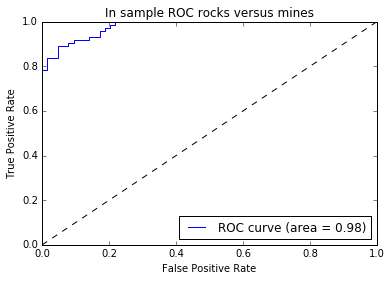

AUC for out-of-sample ROC curve: 0.848485


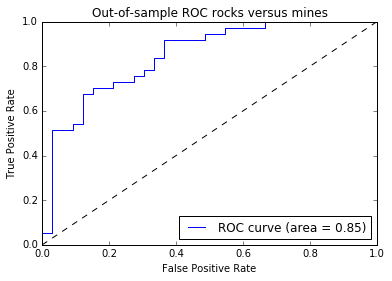

In [22]:

import numpy
import random
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as pl

from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)


def confusionMatrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fn, fp, tn]
    return rtn



#arrange data into list for labels and list of lists for attributes
xList = []
labels = []

for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
    #remove label from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)

#divide attribute matrix and label vector into training(2/3 of data) and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

#check shapes to see what they look like
print("Shape of xTrain array", xTrain.shape)
print("Shape of yTrain array", yTrain.shape)
print("Shape of xTest array", xTest.shape)
print("Shape of yTest array", yTest.shape)

#train linear regression model
rocksVMinesModel = linear_model.LinearRegression()
rocksVMinesModel.fit(xTrain,yTrain)

#generate predictions on in-sample error
trainingPredictions = rocksVMinesModel.predict(xTrain)
print("Some values predicted by model", trainingPredictions[0:5], trainingPredictions[-6:-1])

#generate confusion matrix for predictions on training set (in-sample
confusionMatTrain = confusionMatrix(trainingPredictions, yTrain, 0.5)
#pick threshold value and generate confusion matrix entries
tp = confusionMatTrain[0]; fn = confusionMatTrain[1]; fp = confusionMatTrain[2]; tn = confusionMatTrain[3]

print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate predictions on out-of-sample data
testPredictions = rocksVMinesModel.predict(xTest)

#generate confusion matrix from predictions on out-of-sample data
conMatTest = confusionMatrix(testPredictions, yTest, 0.25)
#pick threshold value and generate confusion matrix entries
tp = conMatTest[0]; fn = conMatTest[1]; fp = conMatTest[2]; tn = conMatTest[3]
print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate ROC curve for in-sample

fpr, tpr, thresholds = roc_curve(yTrain,trainingPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for in-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

#generate ROC curve for out-of-sample
fpr, tpr, thresholds = roc_curve(yTest,testPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for out-of-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out-of-sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

# Using Ridge Regression

AUC             alpha
0.841113841114 999.9999999999999
0.864045864046 99.99999999999999
0.907452907453 10.0
0.9180999181 1.0
0.882882882883 0.1
0.861588861589 0.010000000000000002
0.851760851761 0.0010000000000000002
0.850941850942 0.00010000000000000002
0.849303849304 1.0000000000000003e-05


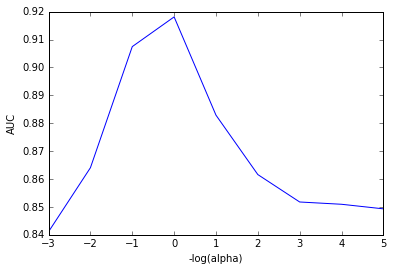

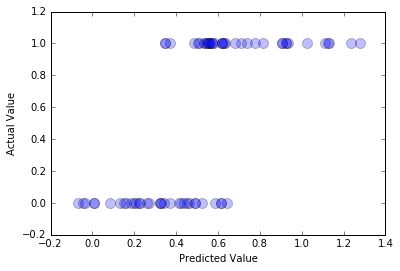

In [27]:

import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as plt

from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
        #remove lable from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)

#divide attribute matrix and label vector into training(2/3 of data) and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [-3, -2, -1, 0,1, 2, 3, 4, 5]]

aucList = []
for alph in alphaList:
    rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
    rocksVMinesRidgeModel.fit(xTrain, yTrain)
    fpr, tpr, thresholds = roc_curve(yTest,rocksVMinesRidgeModel.predict(xTest))
    roc_auc = auc(fpr, tpr)
    aucList.append(roc_auc)


print("AUC             alpha")
for i in range(len(aucList)):
    print(aucList[i], alphaList[i])

#plot auc values versus alpha values
x = [-3, -2, -1, 0,1, 2, 3, 4, 5]
plt.plot(x, aucList)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()

#visualize the performance of the best classifier
indexBest = aucList.index(max(aucList))
alph = alphaList[indexBest]
rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
rocksVMinesRidgeModel.fit(xTrain, yTrain)

#scatter plot of actual vs predicted
plt.scatter(rocksVMinesRidgeModel.predict(xTest), yTest, s=100, alpha=0.25)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()


# Converting a Classification problem to an Ordinary Regression Problem by Assigning Numeric Values to Binary Labels

['V10', 'V48', 'V44', 'V11', 'V35', 'V51', 'V20', 'V3', 'V21', 'V15', 'V43', 'V0', 'V22', 'V45', 'V53', 'V27', 'V30', 'V50', 'V58', 'V46', 'V56', 'V28', 'V39']


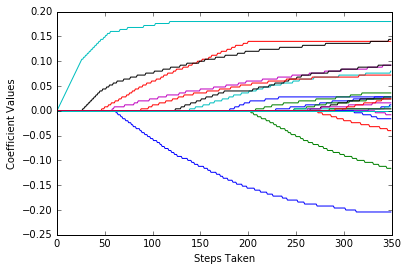

In [4]:
import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
#import pylab as plt
from math import sqrt
import matplotlib.pyplot as plot
%matplotlib inline
import sys

from urllib.request import urlopen
import urllib
#read data from uci data repository
target_url = urllib.request.Request("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]

#initialize a vector of coefficients beta
beta = [0.0] * ncol

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))


#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrow
    for j in range(nrow):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncol)])
        residuals[j] = labelNormalized[j] - labelsHat

    #calculate correlation between attribute columns from normalized wine and residual
    corr = [0.0] * ncol

    for j in range(ncol):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrow)]) / nrow

    iStar = 0
    corrStar = corr[0]

    for j in range(1, (ncol)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]

    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))


    nzBeta = [index for index in range(ncol) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

#make up names for columns of xNum
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]

print(nameList)
for i in range(ncol):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()



In [ ]:
import matplotlib.pyplot as plot